In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import curve_fit

In [123]:
df = pd.read_csv("Emission.csv", encoding="latin-1")
df.rename({"ÉMISSIONS DE CO2": "Co2_emission",
           "ANNÉE" :"Model_year",
           "MARQUE" : "Make",
          "MODÈLE" : "Model",
          "CATÉGORIE DE" : "Vehicle_Class",
          "CYLINDRÉE" : "Engine_Size",
          "TYPE DE" : "Fuel Type",
          "CONSOMMATION DE CARBURANT*" : "FUELCONSUMPTION_CITY",
          "Unnamed: 9" : "FUELCONSUMPTION_HWY",
          "Unnamed: 10" : "FUELCONSUMPTION_COMB",
          "Unnamed: 11" : "FUELCONSUMPTION_COMB_MPG"}, axis = "columns", inplace=True )
df.drop(index = 0, axis = 0, inplace = True)
df

,Model_year,Make,Model,Vehicle_Class,Engine_Size,CYLINDRES,TRANSMISSION,Fuel Type,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,Co2_emission
1,2015,ACURA,ILX,COMPACTE,2,4.0,AS5,Z,9.7,6.7,8.3,34,191
2,2015,ACURA,ILX,COMPACTE,2.4,4.0,M6,Z,10.8,7.4,9.3,30,214
3,2015,ACURA,ILX HYBRID,COMPACTE,1.5,4.0,AV7,Z,6,6.1,6.1,46,140
4,2015,ACURA,MDX SH-AWD,VUS - PETIT,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,255
5,2015,ACURA,RDX AWD,VUS - PETIT,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,2015,VOLVO,XC60 T6,VUS - PETIT,2,4.0,AS8,Z,10.7,7.8,9.4,30,216
1129,2015,VOLVO,XC60 T6 AWD,VUS - PETIT,3,6.0,AS6,X,13.6,9.9,11.9,24,274
1130,2015,VOLVO,XC70 3.2 AWD,VUS - PETIT,3.2,6.0,AS6,X,13.1,9.1,11.3,25,260
1131,2015,VOLVO,XC70 T5,VUS - PETIT,2,4.0,AS8,X,9.8,7.6,8.8,32,202


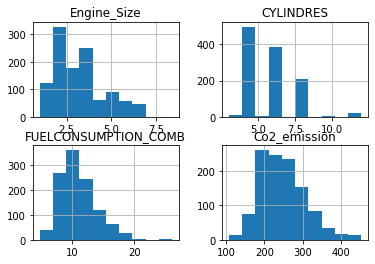

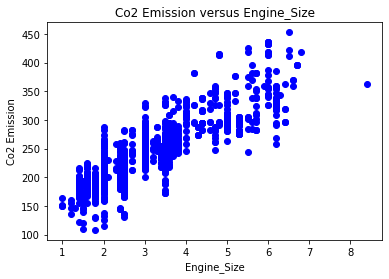

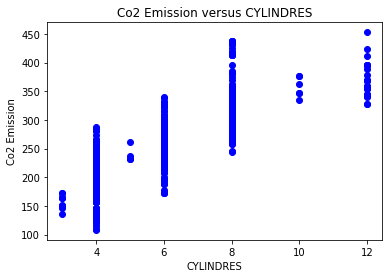

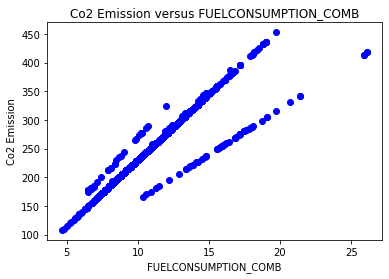

In [109]:
list = ["Engine_Size", "CYLINDRES", "FUELCONSUMPTION_COMB", "Co2_emission"]
for i in list:
    df[i] = df[i].astype(float)

cdf = df[["Engine_Size", "CYLINDRES", "FUELCONSUMPTION_COMB", "Co2_emission"]]
cdf.head()
cdf.hist()
plt.show()

for i in list:
    if i != "Co2_emission":
        plt.scatter(cdf[i], cdf.Co2_emission, color = 'blue')
        plt.xlabel(i)
        plt.ylabel("Co2 Emission")
        plt.title(f"Co2 Emission versus {i}")
        plt.show()

## Simple Linear Regression
### Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.

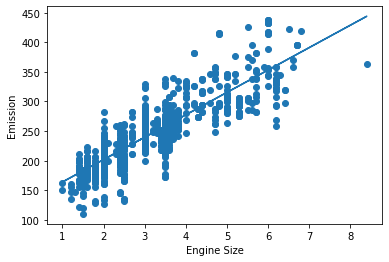

Mean absolute error 23.968226218135218
Mean square error 991.0670731316789
R2 score 0.7111272364322636


In [178]:
#Train and Test data, and model
msk = np.random.randn(len(df)) < 0.8   # make the df true and false value randomly
train = cdf[msk]   # extract the data for train based on true value of msk
test = cdf[~msk]   # extract the data for test based on false value of msk
# print(len(test), len(train))

regr = linear_model.LinearRegression()   # object of the model
train_x = np.asanyarray(train[['Engine_Size']]) # access engine size based on train pattern
train_y = np.asanyarray(train[['Co2_emission']]) # accesss the emission the same way

regr.fit(train_x, train_y)    #training the model

#let's have a look at the coefficients
# print(f'Coefficient {regr.coef_} \n Intercept {regr.intercept_}')

plt.scatter(train.Engine_Size, train.Co2_emission)
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_)
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

#Evaluation, checking our model by using the test dataset
test_x = np.asanyarray(test[['Engine_Size']])
test_y = np.asanyarray(test[['Co2_emission']])
test_y_ = regr.predict(test_x)

#Using different methods to evaluate how accurate our model is
MAE = np.mean(np.absolute(test_y_ - test_y))
MSE = np.mean((test_y_ - test_y)**2)
R2_score = r2_score(test_y, test_y_)

print(f'Mean absolute error {MAE}\nMean square error {MSE}\nR2 score {R2_score}')

## Multiple Linear Regression
### When more than one independent variable is present, the process is called multiple linear regression.

In [177]:
train_x = np.asanyarray(train[["Engine_Size", "CYLINDRES", "FUELCONSUMPTION_COMB"]])
train_y = np.asanyarray(train[["Co2_emission"]])
regr.fit(train_x, train_y)   #training

test_x = np.asanyarray(test[["Engine_Size", "CYLINDRES", "FUELCONSUMPTION_COMB"]])
test_y = np.asanyarray(test[["Co2_emission"]])
test_y_ = regr.predict(test_x)  #predicting

MSE = np.mean((test_y_ - test_y)**2)
Variance = regr.score(test_x, test_y)
print(f'Mean square error {MSE} \nVariance  {Variance}')

Mean square error 512.2997985557884 
Variance  0.8425107477343197


## Polynomial Regression
Sometimes, the trend of data is not really linear, and looks curvy. In this case we can use Polynomial regression methods. In fact, many different regressions exist that can be used to fit whatever the dataset looks like, such as quadratic, cubic, and so on, and it can go on and on to infinite degrees.

PolynomialFeatures() function in Scikit-learn library, drives a new feature sets from the original feature set. That is, a matrix will be generated consisting of all polynomial combinations of the features with degree less than or equal to the specified degree. For example, lets say the original feature set has only one feature, ENGINESIZE. Now, if we select the degree of the polynomial to be 2, then it generates 3 features, degree=0, degree=1 and degree=2:

[[1.   2.   4.  ]
 [1.   2.4  5.76]
 [1.   1.5  2.25]
 ...
 [1.   2.5  6.25]
 [1.   2.   4.  ]
 [1.   3.   9.  ]]
The coefficients: [[ 0.         51.51697431 -1.85181315]] 
The intercept: [104.71443231]


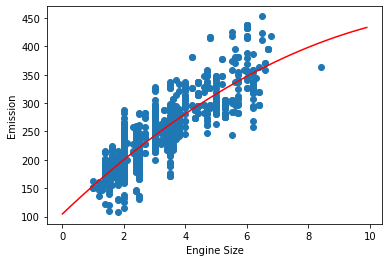

Mean absolute error: -3.264412999155988
Mean square error: 993.6376808297895
R2 score:  0.7103779646928088


In [179]:
train_x = np.asanyarray(train[["Engine_Size"]])
train_y = np.asanyarray(train[["Co2_emission"]])
test_x = np.asanyarray(test[["Engine_Size"]])
test_y = np.asanyarray(test[["Co2_emission"]])

poly = PolynomialFeatures(degree=2)
train_xPoly = poly.fit_transform(train_x)
print(train_xPoly)

#fitting using linear regression
polyLinear = linear_model.LinearRegression()
polyLinear.fit(train_xPoly, train_y)
print(f'The coefficients: {polyLinear.coef_} \nThe intercept: {polyLinear.intercept_}')

#plotting
plt.scatter(cdf.Engine_Size, cdf.Co2_emission)
engine = np.arange(0.0, 10.0, 0.1)
y = polyLinear.intercept_[0] + polyLinear.coef_[0][1]*engine + polyLinear.coef_[0][2]*np.power(engine, 2)
plt.plot(engine, y, '-r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

#evaluation
test_xPoly = poly.fit_transform(test_x)
test_y_ = polyLinear.predict(test_xPoly)

MAE = np.mean(test_y_ - test_y)
MSE = np.mean((test_y_ - test_y)**2)
R2_score = r2_score(test_y, test_y_)
print(f"Mean absolute error: {MAE}\nMean square error: {MSE}\nR2 score:  {R2_score}")

## Non Linear Regression 
Non-linear regression is a method to model the non-linear relationship between the independent variables  𝑥  and the dependent variable  𝑦 . Essentially any relationship that is not linear can be termed as non-linear
Below we will try to fit non-linear modell to the data points correspnding to China's GDP from 1960 to 2014.


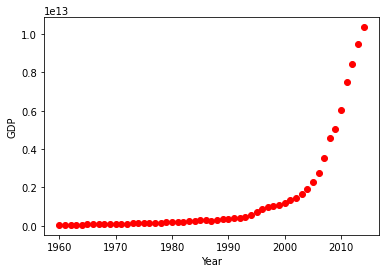

55

In [242]:
china_df = pd.read_csv("china_gdp.csv")
china_df.size

#Let's plot the dataset and see what we have there
x_data, y_data = china_df['Year'], china_df['Value']
plt.plot(x_data, y_data, 'ro')
plt.ylabel("GDP")
plt.xlabel("Year")
plt.show()

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.
#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


Beta_1: 665.2343320961984 
Beta_2: 0.9971948736835452


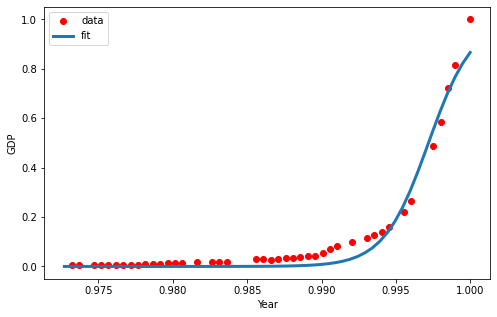

Mean absolute error: -0.01990183154721124
Mean square error: 0.0018993481758541448
R2 score:  0.9718411151912826


In [340]:
#Let's buils our model using the formula shown above
def sigmoid(x, Beta_1, Beta_2):
    div = 1 + np.exp(-Beta_1*(x - Beta_2))
    y = 1 / div
    return y
    
# Let's normalize the x and y
xData = x_data / max(x_data)
yData = y_data / max(y_data)

#Let's split the data into train and test
msk = np.random.randn(len(china_df)) < 0.8
x_train = np.asanyarray(xData[msk])
y_train = np.asanyarray(yData[msk])
x_test = np.asanyarray(xData[~msk])
y_test = np.asanyarray(yData[~msk])

#let's build our model usinf train set
popt, pcov = curve_fit(sigmoid, x_train, y_train)
print(f'Beta_1: {popt[0]} \nBeta_2: {popt[1]}')

#let's plot our regression model
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(x_train, y_train, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

#predict using test dataset
y_test_ = sigmoid(x_test,*popt )
#Evaluation
MAE = np.mean(y_test_ - y_test)
MSE = np.mean((y_test_ - y_test)**2)
R2_score = r2_score(y_test, y_test_)
print(f"Mean absolute error: {MAE}\nMean square error: {MSE}\nR2 score:  {R2_score}")

In [287]:
a = regr.coef_
b = regr.intercept_
y = lambda x, a, b: a*x1 + b*x2 + c*x3 + d
# print(y(3.2,a,b))
# print(a, '\n', b)
x = np.linspace(100, 10, 5)
max(x)

mask = np.random.randn(len(china_df)) < -2
count = 0
for i in mask:
    if(i == True):
        count +=1
# print(count)

print(len(china_df[mask]))
# print(len(china_df[mask]))
x = china_df[mask]
xx = np.asanyarray(x[["Year"]])
xx

2


array([[1961],
       [1990]], dtype=int64)